In [27]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from ridge_regression import RidgeRegression

In [22]:
X, y = load_diabetes(return_X_y=True, scaled=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [23]:
model = RidgeRegression()
best_tau, best_q = 0, np.inf

history = {'mse': [], 'r2': [], 'q': []}
taus = np.arange(start=0.0, stop=1000.0, step=1)

for tau in taus:
    q = model.fit(X_train, y_train, tau).quality(X_test, y_test)
    if q < best_q:
        best_tau = tau
        best_q = q
    history['q'].append(q)

    y_pred = model.predict(X_test)
    history['r2'].append(r2_score(y_test, y_pred, force_finite=False))
    history['mse'].append(mean_squared_error(y_test, y_pred))

print(f'{best_tau=:.0f}, {best_q=:.2f}')

best_tau=166, best_q=127332.10


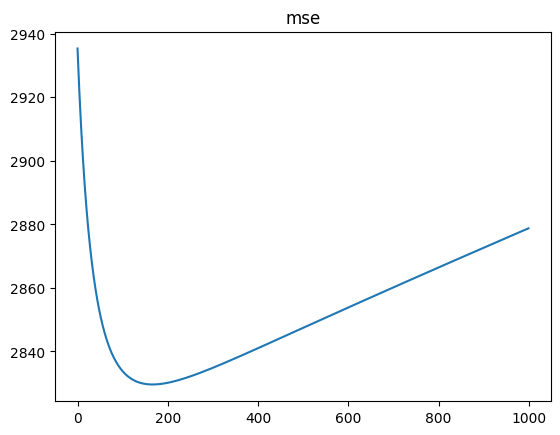

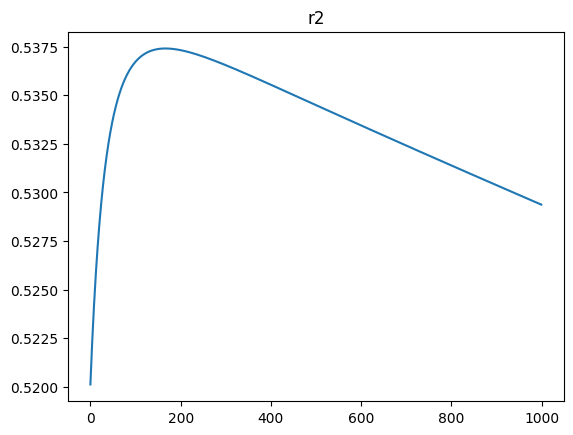

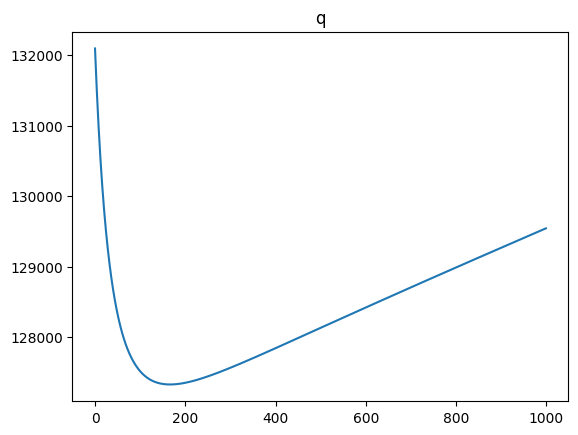

In [24]:
for history_key, y in history.items():
    plt.title(history_key)
    plt.plot(taus, y)
    plt.show()

In [32]:
models = [
    ('My implementation', RidgeRegression(tau=166.0)),
    ('SKLearn implementation', Ridge()),
]

My implementation
Time 0.00018762517720460892
R2 0.5374111504536094
MSE 2829.60230952483


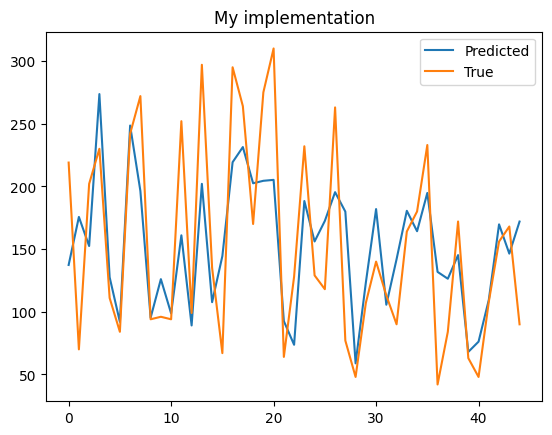

SKLearn implementation
Time 0.0006998749449849129
R2 0.5504610920836893
MSE 2749.777331011302


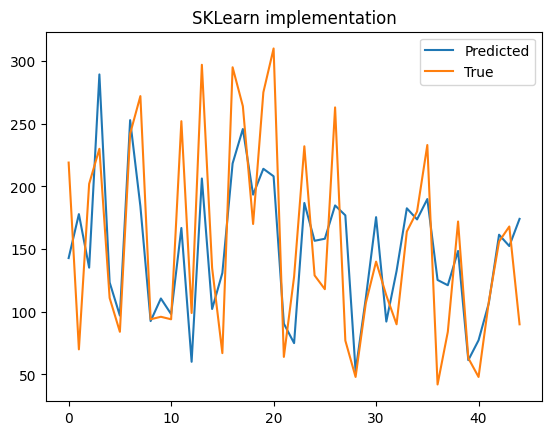

In [34]:
x = list(range(len(X_test)))

for label, model in models:
    print(label)

    start = time.monotonic()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.monotonic()

    print('Time', end - start)
    print('R2', r2_score(y_test, y_pred))
    print('MSE', mean_squared_error(y_test, y_pred))

    plt.title(label)
    plt.plot(x, y_pred, label='Predicted')
    plt.plot(x, y_test, label='True')
    plt.legend()
    plt.show()